In [1]:
import importlib
import torch
import itertools
import numpy as np
from torchvision import transforms
from utils import stats, img, shift, losses

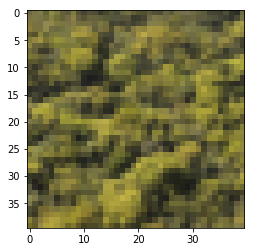

In [2]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(40),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/trees.jpg", transform)
#example_texture = img.random_image(1, 40)

img.show_image(example_texture)

torch.Size([1, 3, 40, 40])
tensor([[[[0.1660, 0.1683, 0.1710,  ..., 0.1910, 0.1896, 0.1872],
          [0.1692, 0.1707, 0.1724,  ..., 0.1888, 0.1869, 0.1854],
          [0.1694, 0.1702, 0.1708,  ..., 0.1882, 0.1872, 0.1874],
          ...,
          [0.1869, 0.1888, 0.1885,  ..., 0.1707, 0.1692, 0.1681],
          [0.1896, 0.1910, 0.1899,  ..., 0.1683, 0.1660, 0.1647],
          [0.1908, 0.1918, 0.1909,  ..., 0.1633, 0.1617, 0.1604]],

         [[0.1526, 0.1545, 0.1568,  ..., 0.1747, 0.1734, 0.1714],
          [0.1554, 0.1566, 0.1581,  ..., 0.1730, 0.1713, 0.1701],
          [0.1557, 0.1563, 0.1568,  ..., 0.1725, 0.1716, 0.1717],
          ...,
          [0.1713, 0.1730, 0.1728,  ..., 0.1566, 0.1554, 0.1543],
          [0.1734, 0.1747, 0.1739,  ..., 0.1545, 0.1526, 0.1514],
          [0.1745, 0.1755, 0.1748,  ..., 0.1502, 0.1487, 0.1476]],

         [[0.0415, 0.0416, 0.0419,  ..., 0.0435, 0.0434, 0.0435],
          [0.0416, 0.0417, 0.0419,  ..., 0.0432, 0.0431, 0.0432],
          [0.04

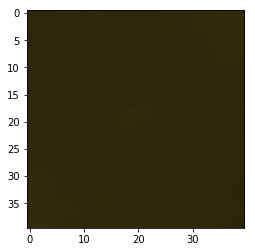

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
importlib.reload(stats)
target = stats.deep_correlation_matrix(example_texture)
y = img.random_image(4, 40)
print(target.size())
img.show_image(target)
print(target)
print(losses.deep_correlation_loss([target], [y]))

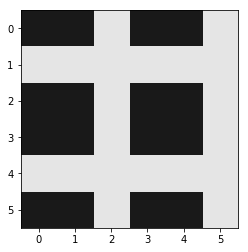

In [5]:
a = [0.1,0.1,0.9,0.1,0.1,0.9]
b = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
c = []

c.append(a)
c.append(b)
c.append(a)
c.append(a)
c.append(b)
c.append(a)


d = [c for i in range(3)]
e = [d]
f = torch.tensor(e).float().to(device)
f
img.show_image(f)

tensor([[[[0.2150, 0.1820, 0.3033, 0.1820, 0.2150, 0.3033],
          [0.3020, 0.2564, 0.3193, 0.2564, 0.3020, 0.3193],
          [0.3167, 0.3087, 0.4544, 0.3087, 0.3167, 0.4544],
          [0.3020, 0.2564, 0.3193, 0.2564, 0.3020, 0.3193],
          [0.2150, 0.1820, 0.3033, 0.1820, 0.2150, 0.3033],
          [0.3167, 0.3087, 0.4544, 0.3087, 0.3167, 0.4544]],

         [[0.2150, 0.1820, 0.3033, 0.1820, 0.2150, 0.3033],
          [0.3020, 0.2564, 0.3193, 0.2564, 0.3020, 0.3193],
          [0.3167, 0.3087, 0.4544, 0.3087, 0.3167, 0.4544],
          [0.3020, 0.2564, 0.3193, 0.2564, 0.3020, 0.3193],
          [0.2150, 0.1820, 0.3033, 0.1820, 0.2150, 0.3033],
          [0.3167, 0.3087, 0.4544, 0.3087, 0.3167, 0.4544]],

         [[0.2150, 0.1820, 0.3033, 0.1820, 0.2150, 0.3033],
          [0.3020, 0.2564, 0.3193, 0.2564, 0.3020, 0.3193],
          [0.3167, 0.3087, 0.4544, 0.3087, 0.3167, 0.4544],
          [0.3020, 0.2564, 0.3193, 0.2564, 0.3020, 0.3193],
          [0.2150, 0.1820, 0.3033, 0

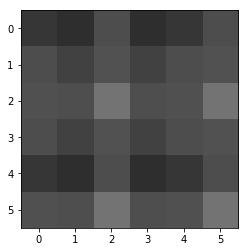

In [7]:
importlib.reload(stats)
target = stats.deep_correlation_matrix(f)
print(target)
img.show_image(target)

tensor([[[[0.1403, 0.0145, 0.1433, 0.0000, 0.0000],
          [0.7401, 0.0055, 0.0001, 0.0000, 0.0000],
          [0.0172, 0.1598, 0.2904, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0445, 0.0586, 0.0383, 0.0000, 0.0000],
          [0.0512, 0.1370, 0.3692, 0.0000, 0.0000],
          [0.3193, 0.2374, 0.0041, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0172, 0.7417, 0.1908, 0.0000, 0.0000],
          [0.0321, 0.1908, 0.1833, 0.0000, 0.0000],
          [0.2998, 0.6071, 0.0134, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]],
       device='cuda:0', grad_fn=<ThMulBackward>)
0.1111111111111111
tensor([[[[0.0156, 0.0016, 0.0159, 0.0000, 0.0000],
          [0.0822, 0.0006, 0.0000, 0.0000, 0.0000],
          [0.0019, 0.0178, 0.0323, 0.0000

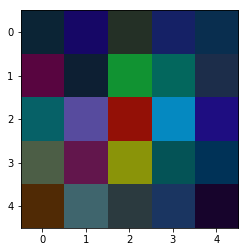

In [22]:
importlib.reload(losses)
y = img.random_image(1, 5)
target = losses.deep_correlation_matrix(y)
#img.show_image(y)
img.show_image(target)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]],
       device='cuda:0', grad_fn=<SliceBackward>)

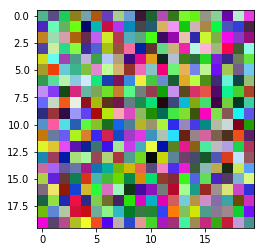

In [21]:
y = img.random_image(1, 20)
img.show_image(y)
z = y.new(y * 0)
z

In [16]:
a = itertools.product([2, 3], [4, 5])
def func(iterable):
    for item in iterable:
        yield item

In [17]:
x = func(a)

while True:
    print("sss")
    z = next(x, None)
    if z == None:
        break
    print(z)

print("asdasddas")

sss
(2, 4)
sss
(2, 5)
sss
(3, 4)
sss
(3, 5)
sss
asdasddas
